## KNN Zoo data set

## importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

## importing data_set

In [2]:
zoo=pd.read_csv("D:\\assignment\\KNN\\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
from sklearn import preprocessing 
label_encoder= preprocessing.LabelEncoder()

In [4]:
zoo["animal name"] = label_encoder.fit_transform(zoo["animal name"])
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
array=zoo.values

In [7]:
array

array([[ 0,  1,  0, ...,  0,  1,  1],
       [ 1,  1,  0, ...,  0,  1,  1],
       [ 2,  0,  0, ...,  0,  0,  4],
       ...,
       [97,  1,  0, ...,  0,  1,  1],
       [98,  0,  0, ...,  0,  0,  7],
       [99,  0,  1, ...,  0,  0,  2]], dtype=int64)

In [8]:
x=array[:,1:17]
x

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [9]:
y=array[:,-1]
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

## visualisation

<AxesSubplot:>

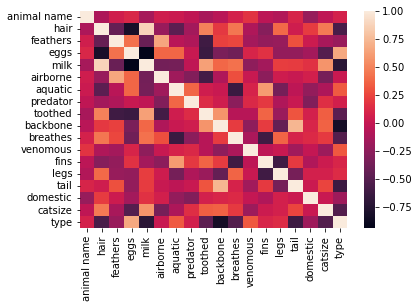

In [10]:
import seaborn as sns
cor=zoo.corr()
sns.heatmap(cor)

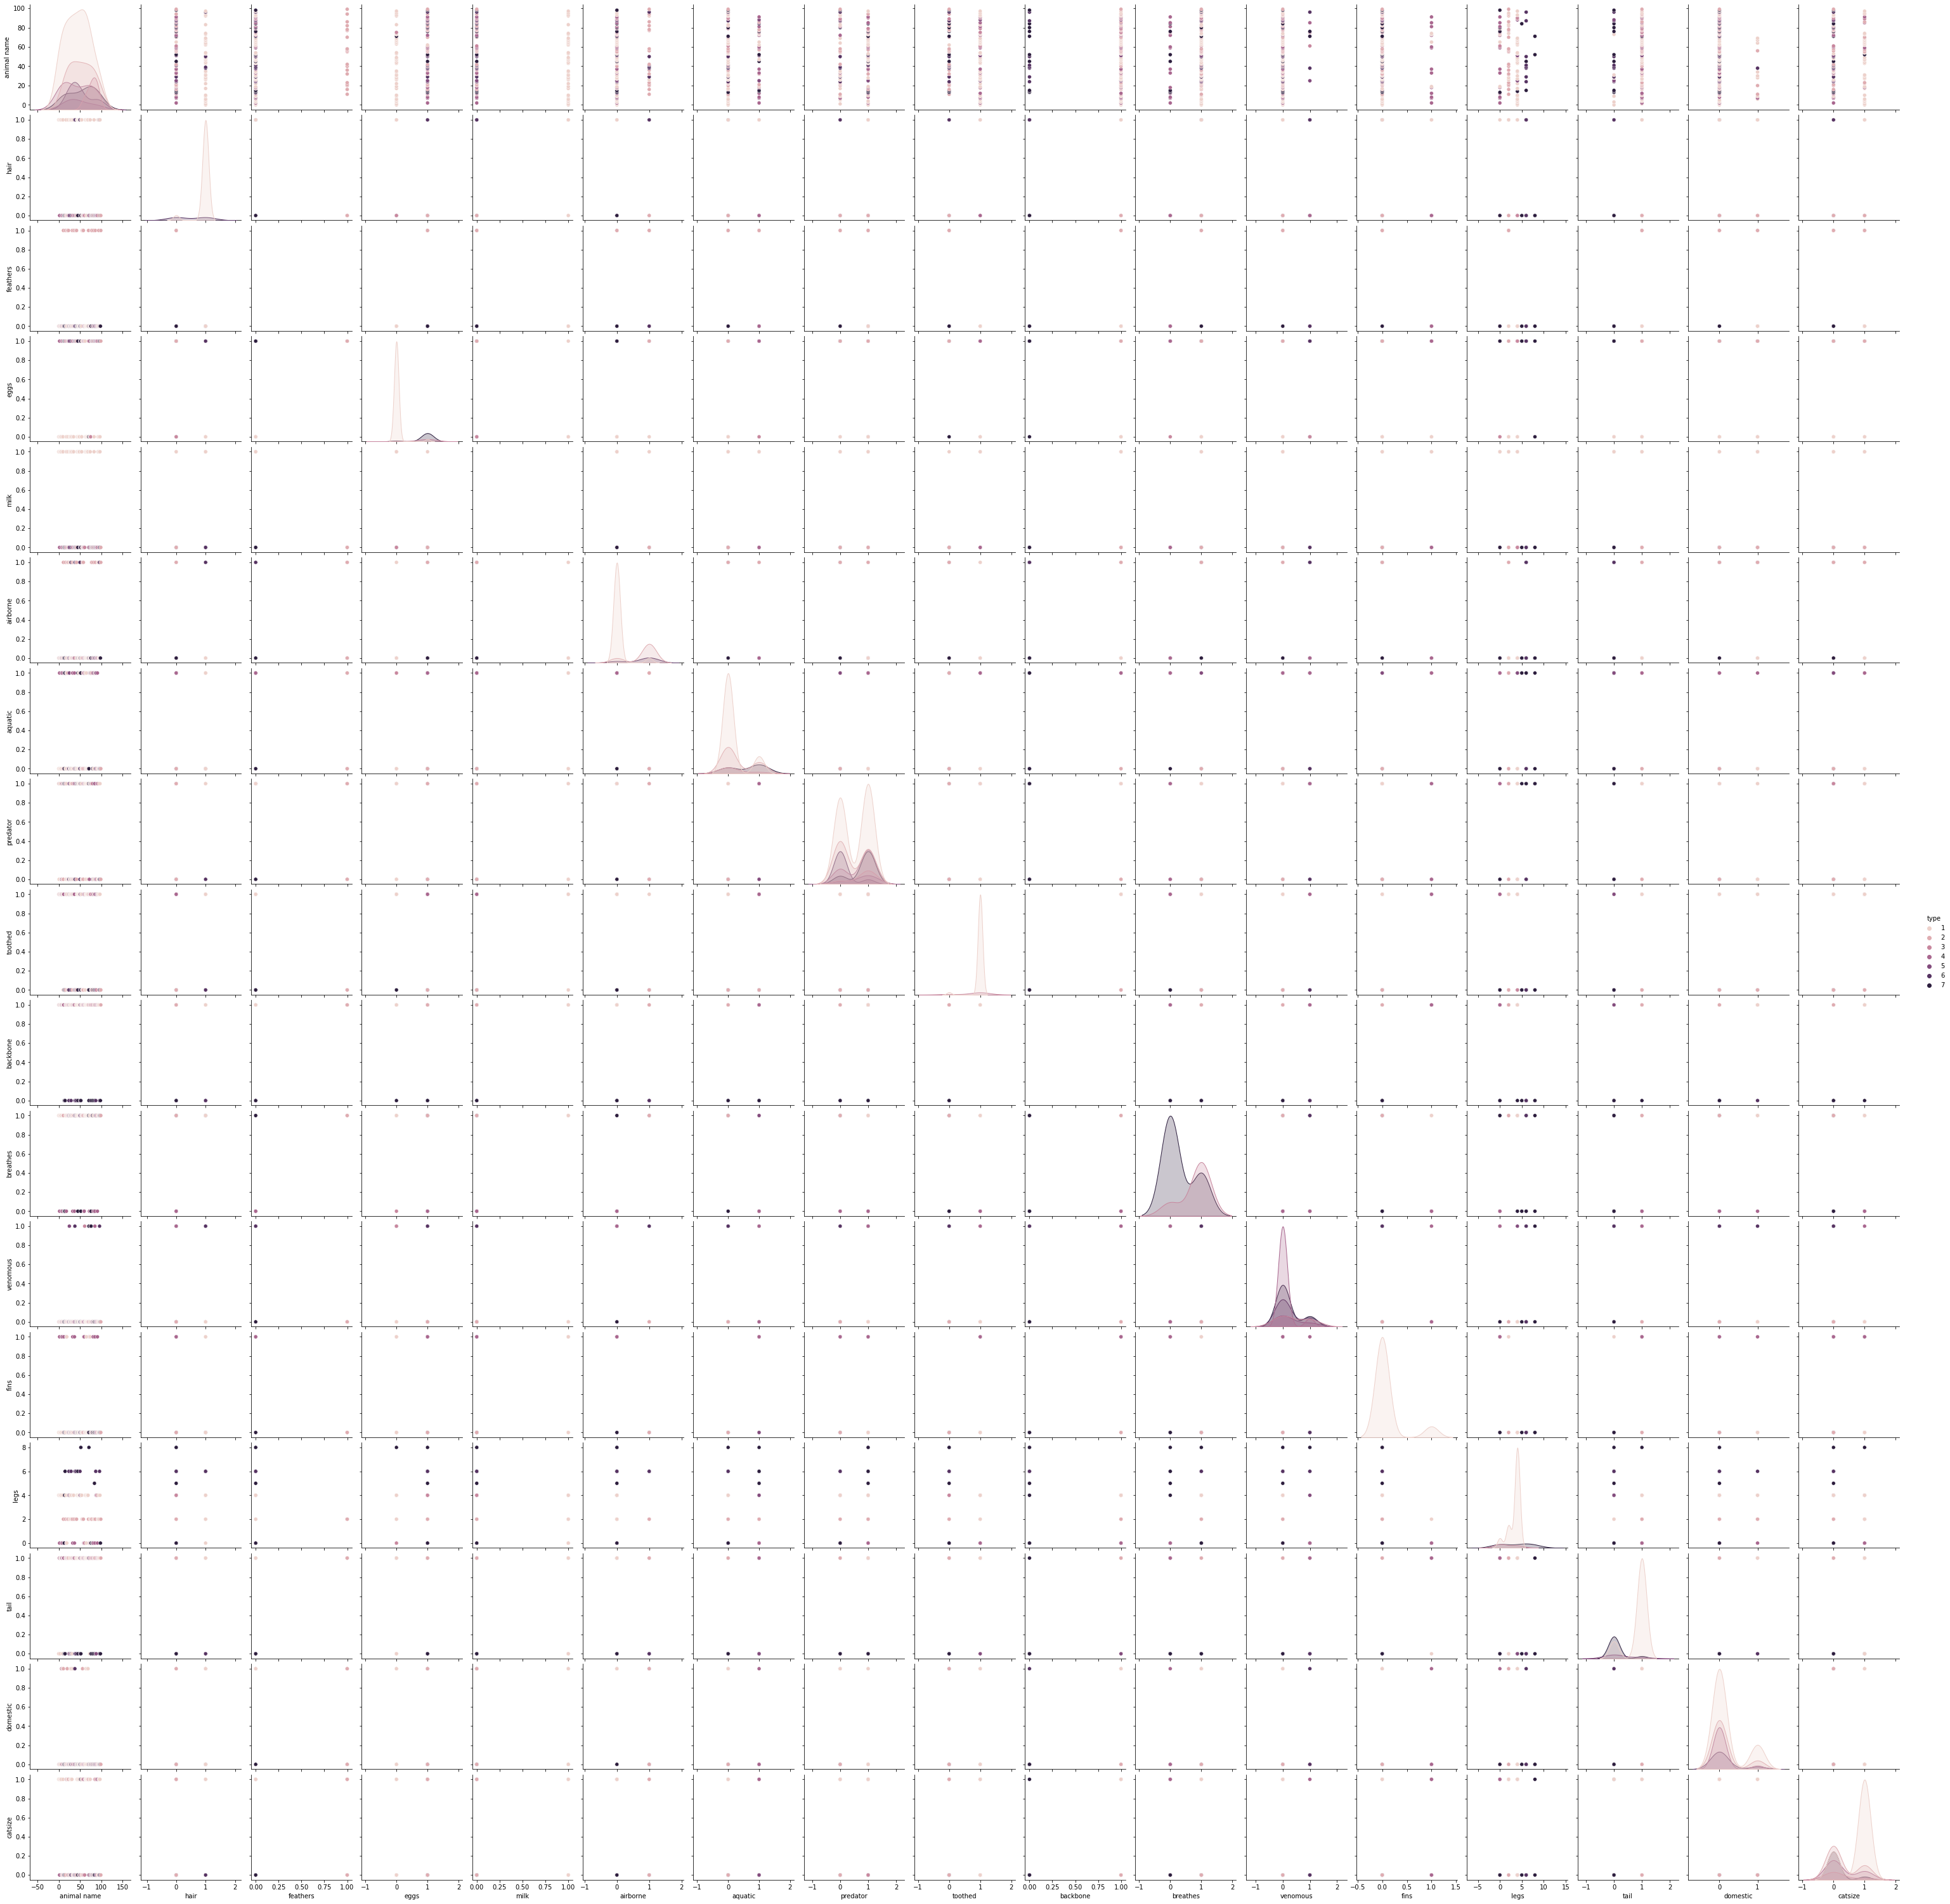

In [11]:
sns.pairplot(zoo,hue='type')

## splitting the data set into training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [31]:
print(x_train)
x_train.shape

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [1 0 1 ... 0 0 0]]


(80, 16)

In [50]:
print(x_test)
x_test.shape

[[1 0 0 1 0 0 0 1 1 1 0 0 2 1 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1]
 [0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]
 [1 0 1 0 1 0 0 0 0 1 1 0 6 0 1 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1]
 [0 0 1 0 1 0 0 0 0 1 0 0 6 0 0 0]
 [1 0 1 0 1 0 0 0 0 1 1 0 6 0 0 0]
 [0 1 1 0 1 1 1 0 1 1 0 0 2 1 0 0]
 [0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]
 [1 0 0 1 1 0 0 1 1 1 0 0 2 1 0 0]
 [0 1 1 0 1 1 1 0 1 1 0 0 2 1 0 0]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 1 1]
 [0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0]]


(21, 16)

In [51]:
print(y_train)
y_train.shape

[5 5 6 1 7 6 7 1 1 2 3 1 1 2 1 1 7 1 2 7 4 4 2 4 1 1 1 5 3 1 7 6 1 1 4 4 2
 1 1 1 6 2 2 1 1 1 7 1 4 1 3 2 2 1 3 2 1 1 2 2 1 7 2 1 1 5 2 4 2 2 7 1 4 4
 2 4 2 7 4 6]


(80,)

In [52]:
print(y_test)
y_test.shape

[1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 3]


(21,)

## Assuming k=1

In [53]:
knn = KNeighborsClassifier(n_neighbors =1)
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[1.   0.95 0.95 1.   0.95]
0.97


C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## with 97% of accuracy, we have k=1.

## Grid search CV

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
import numpy
n_neighbors=numpy.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [56]:
KNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=KNN,param_grid=param_grid)
grid.fit(x,y)

C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [57]:
print(grid.best_params_)

{'n_neighbors': 1}


##   By using grid Search CV, k=1

## using euclidean distance

In [58]:
knn = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [60]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3],
      dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [62]:
cm

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [64]:
accuracy_score(y_test,y_pred)*100

100.0

In [72]:
 from sklearn import metrics

In [75]:
k_range=range(1,30)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

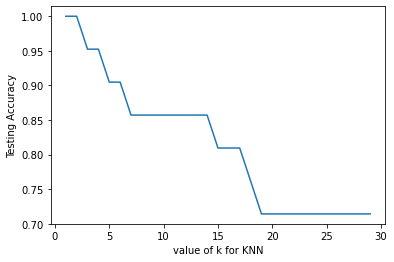

In [76]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('value of k for KNN')
plt.ylabel('Testing Accuracy')

## k=1, for maximum accuracy

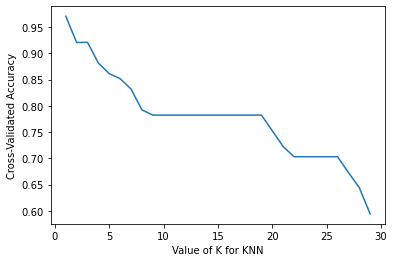

In [67]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=4, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## At k=1,CV accuracy is maximum.